# Plant Disease Detection Using CNN

This notebook demonstrates how to build a Convolutional Neural Network (CNN) for detecting plant diseases from images. We will go through data curation, model building, training, and evaluation while ensuring reproducibility and avoiding overfitting or underfitting.

# *[Dataset-On-Kaggle](https://www.kaggle.com/datasets/abdallahalidev/plantvillage-dataset)*


In [ ]:
# Seed for reproducibility
import random
random.seed(0)

import numpy as np
np.random.seed(0)

import tensorflow as tf
tf.random.set_seed(0)

# Importing Dependencies
import os
import json
import zipfile
from PIL import Image

import numpy as np
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [ ]:
# Mounting the drive to access data
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Path to the zip file containing the dataset
zip_path = '/content/drive/My Drive/Project Datasets/archive.zip'

In [ ]:
# Extracting the zip file
extract_dir = '/content/extracted_files'
os.makedirs(extract_dir, exist_ok=True)

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

print(f'Files extracted to {extract_dir}')

Files extracted to /content/extracted_files


In [ ]:
# Set the path to the extracted dataset directory
dataset_dir = os.path.join(extract_dir, "plantvillage dataset")

In [ ]:
# Listing and counting contents of directories
segmented_dir = os.path.join(dataset_dir, "segmented")
color_dir = os.path.join(dataset_dir, "color")
grayscale_dir = os.path.join(dataset_dir, "grayscale")

print(f"Classes in segmented dataset: {os.listdir(segmented_dir)}")
print(f"Classes in color dataset: {os.listdir(color_dir)}")
print(f"Classes in grayscale dataset: {os.listdir(grayscale_dir)}")

Classes in segmented dataset: ['Grape___Esca_(Black_Measles)', 'Corn_(maize)___healthy', 'Pepper,_bell___healthy', 'Cherry_(including_sour)___healthy', 'Grape___Black_rot', 'Grape___healthy', 'Tomato___Target_Spot', 'Apple___Black_rot', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Tomato___Bacterial_spot', 'Corn_(maize)___Common_rust_', 'Blueberry___healthy', 'Strawberry___healthy', 'Apple___Apple_scab', 'Raspberry___healthy', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Squash___Powdery_mildew', 'Soybean___healthy', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Tomato___Tomato_mosaic_virus', 'Tomato___Early_blight', 'Potato___Early_blight', 'Tomato___healthy', 'Tomato___Septoria_leaf_spot', 'Potato___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Potato___Late_blight', 'Tomato___Leaf_Mold', 'Pepper,_bell___Bacterial_spot', 'Cherry_(including_sour)___Powdery_mildew', 'Apple___healthy', 'Strawberry___Leaf_scorch', 'Peach___Bacterial_spot', 'Corn_(maize)___Norther

In [ ]:
# Setting up data generators
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    horizontal_flip=True,
    zoom_range=0.2,
    shear_range=0.2,
    rotation_range=30
)

train_generator = datagen.flow_from_directory(
    color_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    color_dir,
    target_size=(150, 150,),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 43456 images belonging to 38 classes.
Found 10849 images belonging to 38 classes.


In [ ]:
# Defining the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),  # Added dropout layer to prevent overfitting
    layers.Dense(38, activation='softmax')  # Assuming 38 classes as per the directory structure
])

In [ ]:
# Compiling the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Setting up callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=0.001)

In [ ]:
# Training the model
history = model.fit(
    train_generator,
    epochs=5,
    validation_data=validation_generator,
    callbacks=[early_stopping, reduce_lr]
)

Epoch 1/5
1358/1358 [==============================] - 392s 283ms/step - loss: 1.7166 - accuracy: 0.5175 - val_loss: 0.7675 - val_accuracy: 0.7657 - lr: 0.0010
Epoch 2/5
1358/1358 [==============================] - 366s 270ms/step - loss: 0.7637 - accuracy: 0.7628 - val_loss: 0.6184 - val_accuracy: 0.8029 - lr: 0.0010
Epoch 3/5
1358/1358 [==============================] - 361s 266ms/step - loss: 0.5673 - accuracy: 0.8196 - val_loss: 0.3756 - val_accuracy: 0.8765 - lr: 0.0010
Epoch 4/5
1358/1358 [==============================] - 343s 253ms/step - loss: 0.4608 - accuracy: 0.8515 - val_loss: 0.3011 - val_accuracy: 0.9036 - lr: 0.0010
Epoch 5/5
1358/1358 [==============================] - 342s 252ms/step - loss: 0.3936 - accuracy: 0.8731 - val_loss: 0.2522 - val_accuracy: 0.9148 - lr: 0.0010


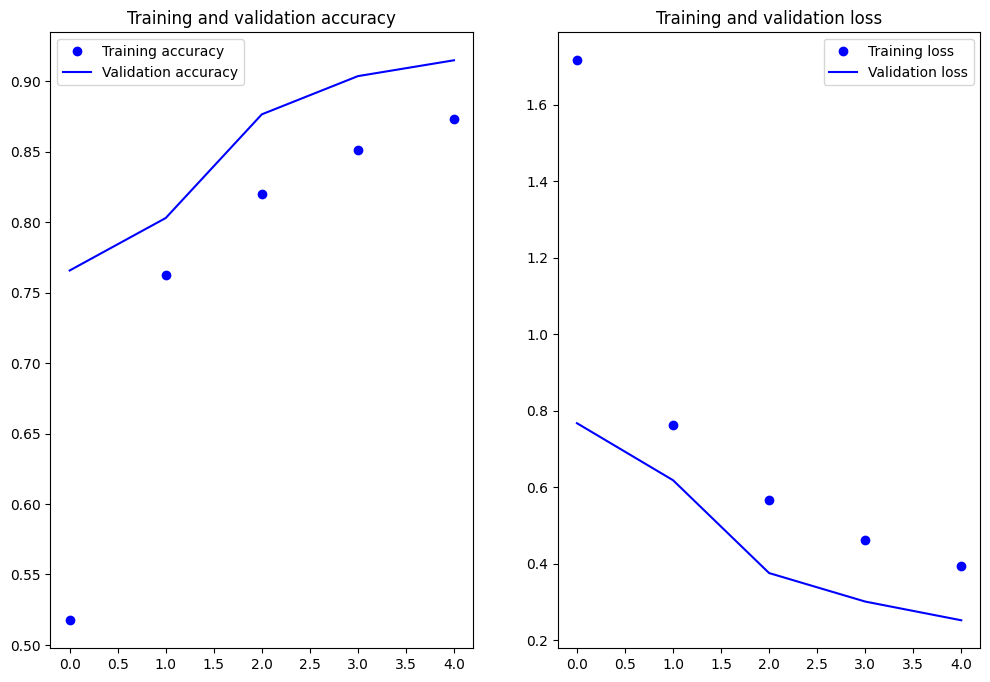

In [ ]:
# Plotting training history
def plot_training_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(len(acc))

    plt.figure(figsize=(12, 8))

    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'bo', label='Training accuracy')
    plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

    plt.show()

plot_training_history(history)

In [ ]:
# Model Evaluation
print("Evaluating model...")
val_loss, val_accuracy = model.evaluate(validation_generator, steps=validation_generator.samples // validation_generator.batch_size)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")

Evaluating model...
339/339 [==============================] - 71s 207ms/step - loss: 0.2491 - accuracy: 0.9173
Validation Accuracy: 91.73%


In [ ]:
def plot_confusion_matrix(cm, classes, title='Confusion Matrix', cmap='Blues'):
    plt.figure(figsize=(20, 20))  # Increase the figure size
    sns.heatmap(cm, annot=True, fmt='d', cmap=cmap, xticklabels=classes, yticklabels=classes)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.xticks(rotation=90)  # Rotate x labels for better readability
    plt.yticks(rotation=0)   # Rotate y labels for better readability
    plt.show()

In [ ]:
# Predicting the validation set
validation_generator.reset()
Y_pred = model.predict(validation_generator, steps=validation_generator.samples // validation_generator.batch_size + 1)
y_pred = np.argmax(Y_pred, axis=1)

340/340 [==============================] - 70s 205ms/step


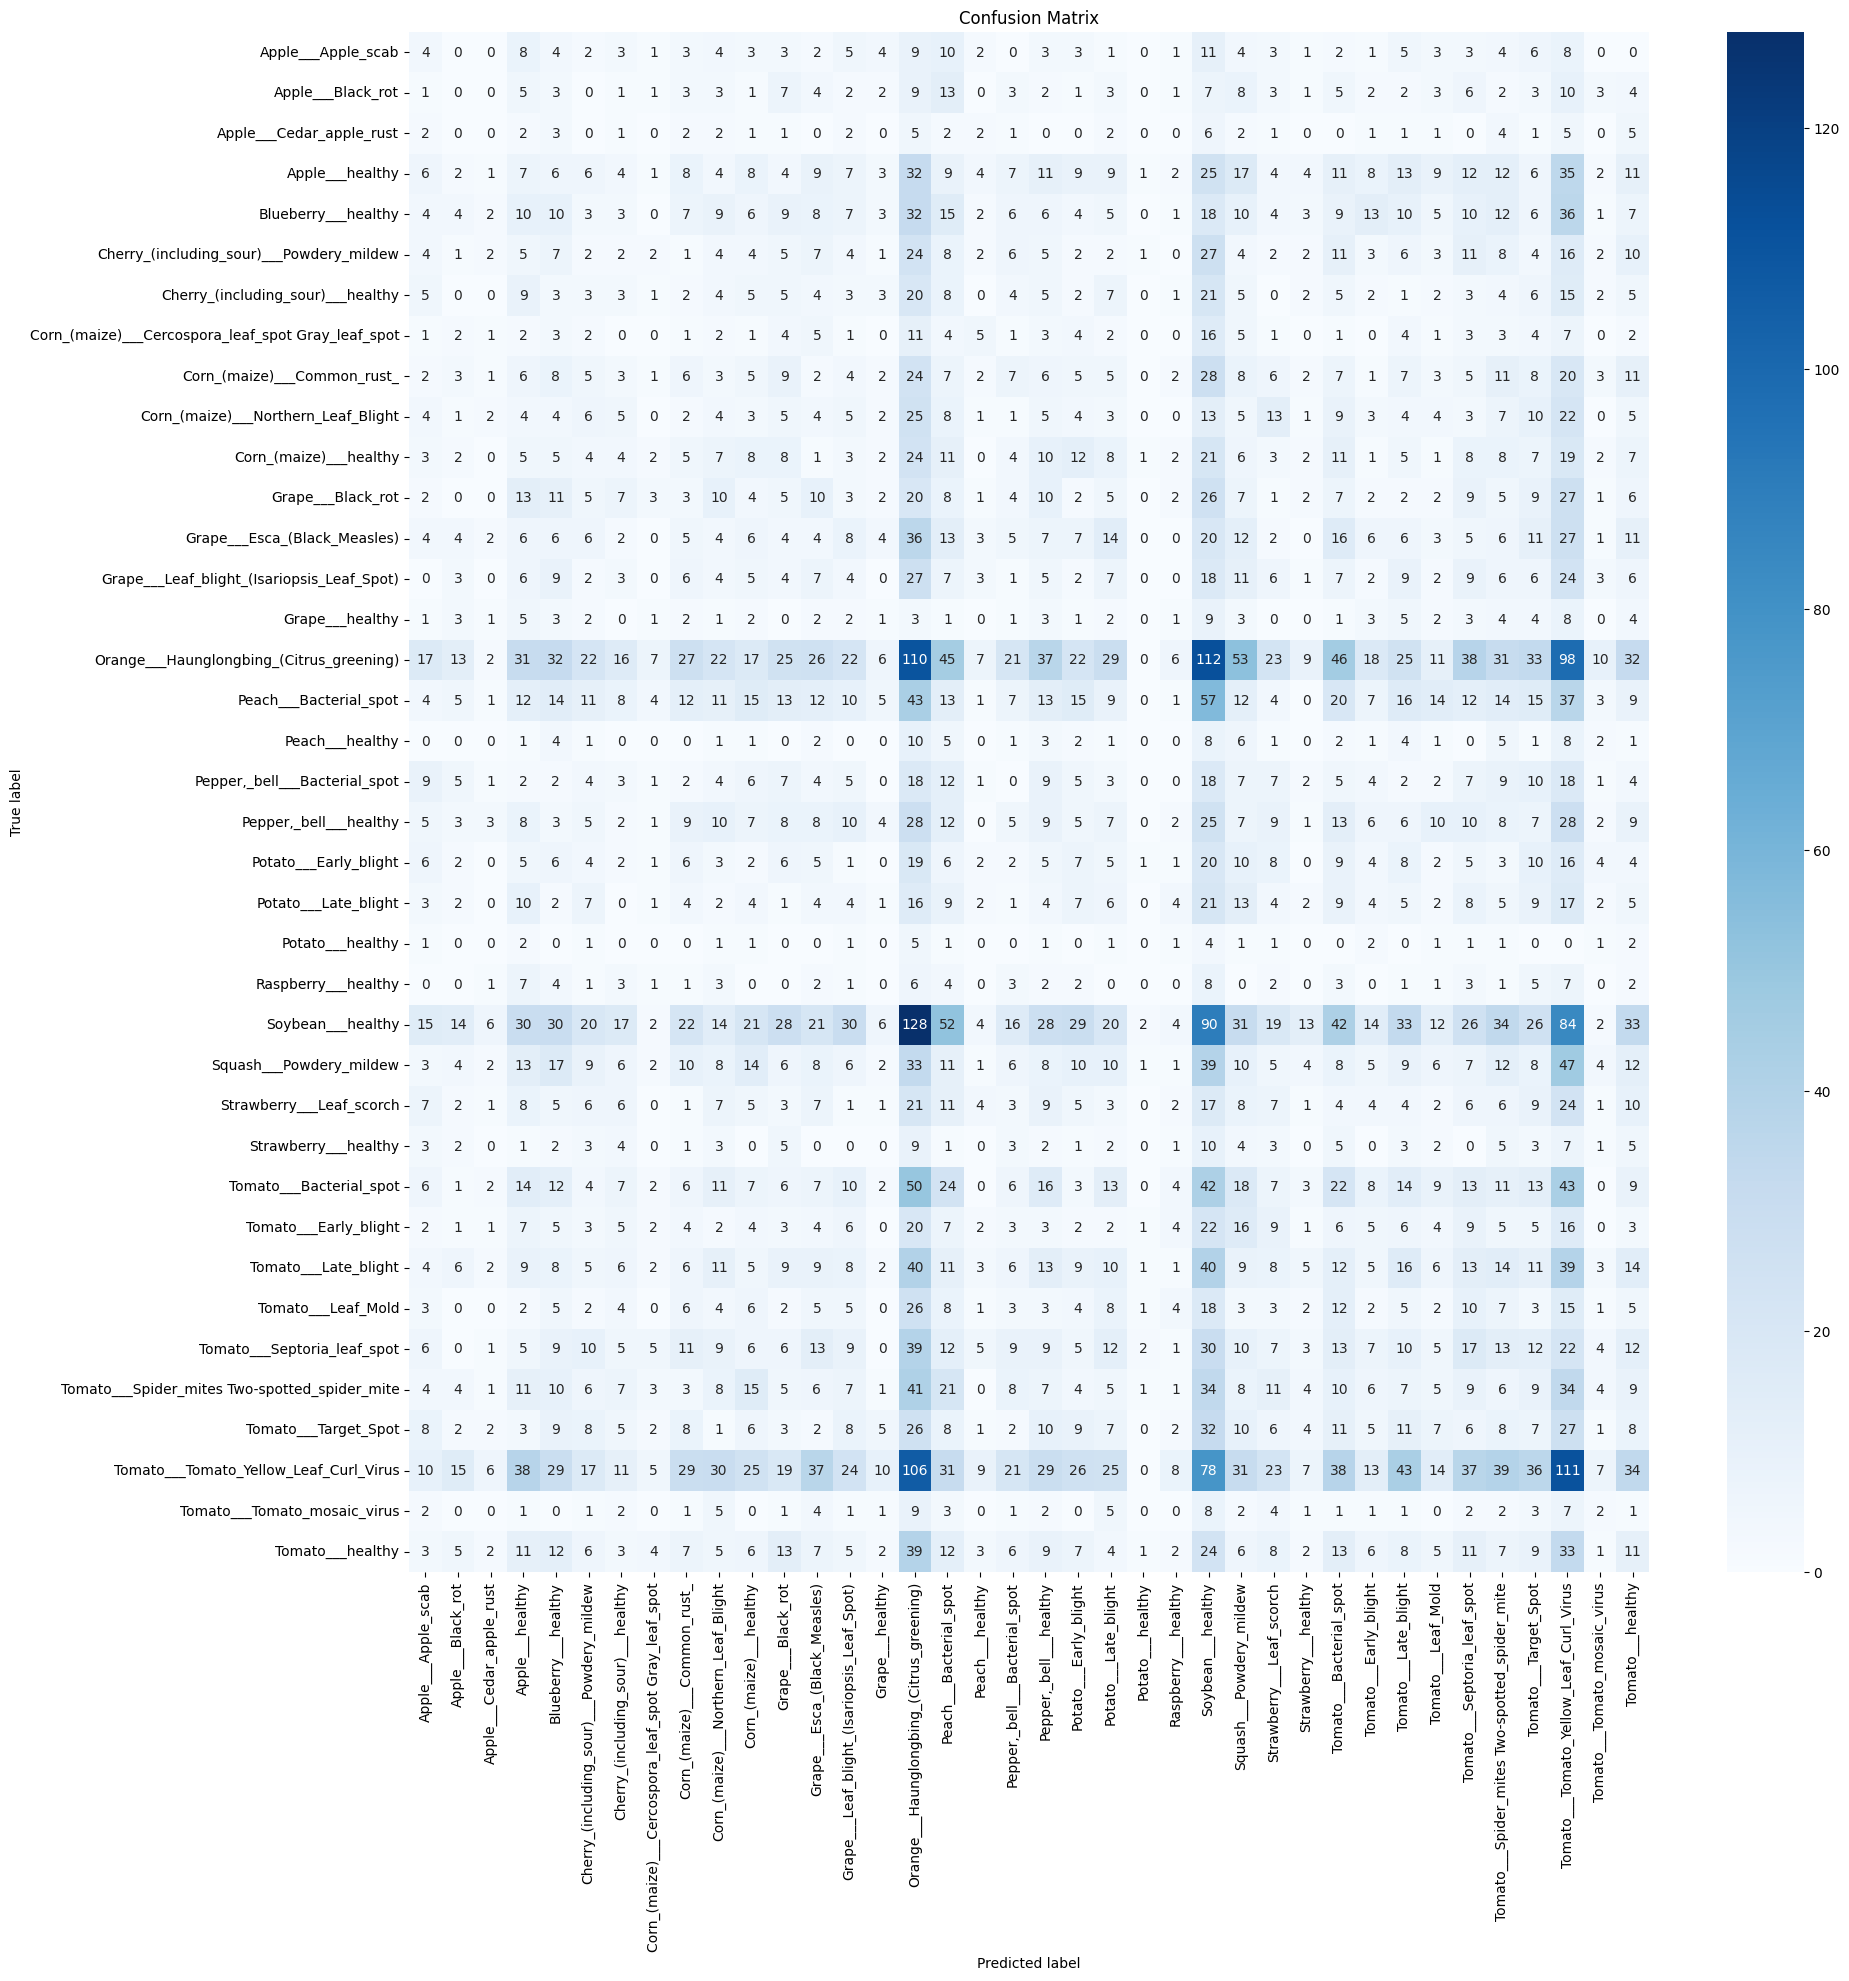

In [ ]:
# Confusion matrix
cm = confusion_matrix(validation_generator.classes, y_pred)
cm_plot_labels = list(validation_generator.class_indices.keys())

plot_confusion_matrix(cm, cm_plot_labels)

**Building the predictive system**

In [ ]:
# Function to Load and Preprocess the Image using Pillow
def load_and_preprocess_image(image_path, target_size=(150, 150)):
    # Load the image
    img = Image.open(image_path)
    # Resize the image
    img = img.resize(target_size)
    # Convert the image to a numpy array
    img_array = np.array(img)
    # Add batch dimension
    img_array = np.expand_dims(img_array, axis=0)
    # Scale the image values to [0, 1]
    img_array = img_array.astype('float32') / 255.
    return img_array

# Function to Predict the Class of an Image
def predict_image_class(model, image_path, class_indices):
    preprocessed_img = load_and_preprocess_image(image_path)
    predictions = model.predict(preprocessed_img)
    predicted_class_index = np.argmax(predictions, axis=1)[0]
    predicted_class_name = class_indices[predicted_class_index]
    return predicted_class_name

In [ ]:
# Create a mapping from class indices to class names
class_indices = {v: k for k, v in train_generator.class_indices.items()}

In [ ]:
class_indices

{0: 'Apple___Apple_scab',
 1: 'Apple___Black_rot',
 2: 'Apple___Cedar_apple_rust',
 3: 'Apple___healthy',
 4: 'Blueberry___healthy',
 5: 'Cherry_(including_sour)___Powdery_mildew',
 6: 'Cherry_(including_sour)___healthy',
 7: 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 8: 'Corn_(maize)___Common_rust_',
 9: 'Corn_(maize)___Northern_Leaf_Blight',
 10: 'Corn_(maize)___healthy',
 11: 'Grape___Black_rot',
 12: 'Grape___Esca_(Black_Measles)',
 13: 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 14: 'Grape___healthy',
 15: 'Orange___Haunglongbing_(Citrus_greening)',
 16: 'Peach___Bacterial_spot',
 17: 'Peach___healthy',
 18: 'Pepper,_bell___Bacterial_spot',
 19: 'Pepper,_bell___healthy',
 20: 'Potato___Early_blight',
 21: 'Potato___Late_blight',
 22: 'Potato___healthy',
 23: 'Raspberry___healthy',
 24: 'Soybean___healthy',
 25: 'Squash___Powdery_mildew',
 26: 'Strawberry___Leaf_scorch',
 27: 'Strawberry___healthy',
 28: 'Tomato___Bacterial_spot',
 29: 'Tomato___Early_blight',
 30: '

In [ ]:
# saving the class names as json file
json.dump(class_indices, open('class_indices.json', 'w'))

In [ ]:
# Example Usage
#image_path = '/content/test_apple_black_rot.JPG'
image_path = '/content/test_blueberry_healthy.jpg'
#image_path = '/content/test_potato_early_blight.jpg'
predicted_class_name = predict_image_class(model, image_path, class_indices)

# Output the result
print("Predicted Class Name:", predicted_class_name)

1/1 [==============================] - 0s 129ms/step
Predicted Class Name: Blueberry___healthy


**Saving the model to Google drive**

In [ ]:
model.save('drive/MyDrive/Final Year Project/trained model/Plant_Disease_Prediction_System.h5')

In [ ]:
model.save('Plant_Disease_Prediction_System.h5')